_How to save RDA Files_
filename = "mydata.rda"

# Save the DataFrame as an RDA file
save(filename, Dict("my_dataframe" => dat

# How to load CSVs
variable name = CSV.file(file_name or variable holding name) |> DataFrame

# import packages
Make sure the loop at the start has the package name in the PkgList to install the package as a precaution
Import the package or use the 'using function'

# Save graphics
savefig("scatter_plot.png")
# TODO
- Add in some long and wide df
- See how regression model handles t- Create a long DF for year and cheapest price of fuel
is


# Important Notes
The regression model uses a year character for now, the year is set to a string that will convert weekly dates to a year string based
on the first column, splitting by '-'

# Long DF example
ID Year Fuel Type Price <br />
1R2004 2004 Regular Petrol 2.34 <br />
1D2004 2004 Diesel   7.60 <br />
2R2005 2005 ... 2.40 <br />

Wide DF will link with the Long DF ie
1R2004 = Regular petrol, 2004 price.
Car Type, 2010/11, Fuel Type, P

# IDs for separate dataframes to join together a))

In [13]:
begin
	using Pkg
    PkgList = ["CSV", "DataFrames", "Ipopt", "JuMP", "Plots", "PlutoUI", "Queryverse", "XLSX", "StatsBase", "Query", "VegaLite", "RData", "Lathe", "GLM", "StatsPlots", "MLBase", "RDatasets", "Clustering", "CodecBzip2", "RCall"]
    for p in PkgList
        if Base.find_package(p) == nothing
            Pkg.add(p)
        end
	end
end


In [14]:
using CSV, VegaLite, DataFrames, RData, Query, Queryverse, CodecBzip2, Plots

In [15]:
# loads the dataframe (loads as a dictionary)
weekly_energy_prices = load("price.rda",convertdataframes=true)
weekly_energy_prices = weekly_energy_prices["price"]
# rename price_details Fuel to Fuel Type
#df = DataFrame(A = 1:4, B = ["M", "F", "F", "M"], C = [32, 45, 28, 67])
#df_new = rename(df, :A => :ID, :B => :Gender, :C => :Age)

LoadError: ArgumentError: No file exists at given path: price.rda

In [16]:
weekly_energy_prices = rename(weekly_energy_prices, :Fuel => :"Fuel_Type")

LoadError: UndefVarError: `weekly_energy_prices` not defined

In [17]:
weekly_energy_prices |> describe
# drop 


LoadError: UndefVarError: `weekly_energy_prices` not defined

In [18]:
# Resolved a selector issue for years
function compile_year_data(year, dataset)
    df_year_data = DataFrame()
    # compile year data from the fields given
    for data in eachrow(dataset)
        #ate_to_string = string(data.Week)
        #year = split(string(data.Week),"-")[1]
        year_data = split(string(data.Week),"-")[1]
        if occursin(year, year_data)
            push!(df_year_data,data)
        end
    end
    return(df_year_data)
end

compile_year_data (generic function with 1 method)

In [19]:
year = "2008"
df_year_data = compile_year_data(year, weekly_energy_prices)
df_year_data |> describe

LoadError: UndefVarError: `weekly_energy_prices` not defined

In [20]:
df_year_data

LoadError: UndefVarError: `df_year_data` not defined

In [21]:
# now we would just need a selector for this

In [22]:
# Turn the iterator into a function!
function remove_col_text(column_name,text_string,target_df, replacement_text)
    for col in column_name
        for (i, text) in enumerate(target_df[!, col])
            target_df[i, col] = replace(uppercasefirst(lowercase(text)), text_string => replacement_text)
        end
    end
end

remove_col_text (generic function with 1 method)

In [23]:
# test to see how to add fields to a dataframe!
# We use :product to specify the "product" column, and Symbol("Cost in Dollars") to create a symbol for the "Cost in Dollars" column.
# We use the => operator to assign values to these columns.

# This code should create a new DataFrame df_test with the desired columns and values without encountering the "invalid keyword argument name" error.
df_fuelprice_dollars = DataFrame(
    Symbol("Week") => df_year_data.Week,
    #Symbol("Fuel Type") => df_year_data."Fuel price measure",
    Symbol("Fuel_Type") => df_year_data."Fuel_Type",
    Symbol("Cost in Dollars") => df_year_data.Value / 100
)

# Define the text to remove

# We define an example DataFrame df with two columns: "Fuel price measure" and "Value Label."

# We specify the text_to_find (string to be replaced) and the replacement_text (string to replace with).

# We create a loop to iterate through the specified columns (columns_to_search) and replace the text using the replace function for each row in those columns.

# After running this code, the specified text ("excluding taxes" in this example) will be replaced with the desired replacement text ("without taxes" in this example) in the specified columns of the DataFrame.
# text_to_find = " excluding taxes"
# replacement_text = ""
# columns_to_search = [:"Fuel"]
# text_to_find = ["excluding taxes","price"]

# for text in text_to_find
#     remove_col_text(columns_to_search, text, df_fuelprice_dollars, replacement_text)
# end

# Remove the text from the specified columns


LoadError: UndefVarError: `df_year_data` not defined

# TODO Plot
This could be a function so it is easier to plot but not sure how it will work may have to return
the data back so it gets displayed.

For a later consideration

In [24]:
v

LoadError: UndefVarError: `v` not defined

In [25]:
function plot_data(df, lookupvalue, lookupcolumn, columntoplot, figname)
    """
    Function to plot the data, takes in values as needed to model the graph.
    Gets the dataset, needs a lookup value and the column to find,
    plots the data matching in the lookup column.

    Plot the data example, using one field.
    l_value = "Premium petrol 95R" <- what data we are looking for
    l_column = "Fuel_Type" <- the column the data is in
    c_toplot = "Cost in Dollars" <- the column to graph
    figname = "lineplot_prem_petrol" <- name of the figure when saved
    df_fuelprice_dollars <- target dataset to look for
    plot_data(df_fuelprice_dollars, l_value, l_column, c_toplot, figname)
    """
    
    # Create an empty array to store the data to be plotted
    plot_data = Float64[]  # Assuming the data is numeric
    
    for row in eachrow(df)
        if occursin(lookupvalue, string(row[lookupcolumn]))  # Convert the column value to a string for comparison
            push!(plot_data, row[columntoplot])
        end
    end
    
    # Plot the extracted data
    plot_data = plot(plot_data, legend=false, xlabel=lookupcolumn, ylabel=columntoplot)
    savefig("JuliaPlots/$figname.png")
    plot_data
end

plot_data (generic function with 1 method)

In [26]:
l_value = "Diesel" 
l_column = "Fuel_Type" 
c_toplot = "Cost in Dollars" 
figname = "lineplot_diesel"
plot_data(df_fuelprice_dollars, l_value, l_column, c_toplot, figname)

LoadError: UndefVarError: `df_fuelprice_dollars` not defined

In [27]:
l_value = "Regular petrol" 
l_column = "Fuel_Type" 
c_toplot = "Cost in Dollars" 
figname = "lineplot_reg_petrol"
plot_data(df_fuelprice_dollars, l_value, l_column, c_toplot, figname)

LoadError: UndefVarError: `df_fuelprice_dollars` not defined

In [28]:
l_value = "Premium petrol 95R" 
l_column = "Fuel_Type" 
c_toplot = "Cost in Dollars" 
figname = "lineplot_prem_petrol"
plot_data(df_fuelprice_dollars, l_value, l_column, c_toplot, figname)

LoadError: UndefVarError: `df_fuelprice_dollars` not defined

# linear regression test
from https://www.machinelearningplus.com/linear-regression-in-julia/

In [29]:
 # Load the installed packages
using Lathe, GLM, Statistics, StatsPlots, MLBase

# Enable printing of 1000 columns
ENV["COLUMNS"] = 1000

1000

In [30]:
df = df_fuelprice_dollars
first(df,5)


LoadError: UndefVarError: `df_fuelprice_dollars` not defined

In [31]:
println(size(df))
#> (111, 3)
println(names(df))

LoadError: UndefVarError: `df` not defined

In [32]:
# Fix column names by replacing ' ', '-', '/' with '_'
colnames = Symbol[]
for i in string.(names(df))
    push!(colnames,Symbol(replace(replace(replace(strip(i)," " => "_"),"-" => "_"), "/" => "_")))
end

rename!(df, colnames);

LoadError: UndefVarError: `df` not defined

In [33]:
cid_bxplt = boxplot(df.Cost_in_Dollars, title = "Box Plot -Cost in Dollars", ylabel = "Fuel Cost (dollars)", legend = false)
savefig("JuliaPlots/boxplot_FuelCost.png")
cid_bxplt

LoadError: UndefVarError: `df` not defined

In [34]:
# Outlier removal
first_percentile = percentile(df.Cost_in_Dollars, 25)
iqr_value = iqr(df.Cost_in_Dollars)
df = df[df.Cost_in_Dollars .>  (first_percentile - 1.5*iqr_value),:];

LoadError: UndefVarError: `df` not defined

In [35]:
# Density Plot
density_cid = density(df.Cost_in_Dollars , title = "Density Plot - Cost in Dollars", ylabel = "Frequency", xlabel = "Cost In Dollars", legend = false)
savefig("JuliaPlots/DensityPlot_CID.png")
density_cid

LoadError: UndefVarError: `df` not defined

In [36]:
df_fuelprice_dollars

LoadError: UndefVarError: `df_fuelprice_dollars` not defined

In [37]:
for data in eachrow(df_fuelprice_dollars.Fuel_Type)
    println(data)
end

LoadError: UndefVarError: `df_fuelprice_dollars` not defined

In [38]:
# clean the fields
df_fuelprice_dollars.Fuel_Type = replace(df_fuelprice_dollars.Fuel_Type, "Diesel price " => "Diesel")
df_fuelprice_dollars.Fuel_Type = replace(df_fuelprice_dollars.Fuel_Type, "Regular petrol price " => "Regular petrol")
df_fuelprice_dollars.Fuel_Type = replace(df_fuelprice_dollars.Fuel_Type, "Premium petrol 95R price " => "Premium petrol 95R")

# Filter the DataFrame for "Diesel" fuel type

df_diesel = filter(row -> row.Fuel_Type == "Diesel", df_fuelprice_dollars)

# Filter the DataFrame for "Regular petrol" fuel type
df_regular_petrol = filter(row -> row.Fuel_Type == "Regular petrol", df_fuelprice_dollars)

df_premium_petrol = filter(row -> row.Fuel_Type == "Premium petrol 95R", df_fuelprice_dollars)

# Display the separate DataFrames
println("DataFrame for Diesel:")
println(df_diesel)

println("\nDataFrame for Regular petrol:")
println(df_regular_petrol)

println("\nDataFrame for Premium petrol:")
println(df_premium_petrol)

unique_fuel_types = unique(df_fuelprice_dollars.Fuel_Type)
println(unique_fuel_types)

cor_df = DataFrame(
    Diesel = df_diesel.Cost_in_Dollars,
    Regular_Petrol = df_regular_petrol.Cost_in_Dollars
    )
cor_df

LoadError: UndefVarError: `df_fuelprice_dollars` not defined

In [39]:
df_diesel

LoadError: UndefVarError: `df_diesel` not defined

In [40]:
# Correlation Analysis
#println("Correlation of Life Expectancy with Adult Mortality Rate is ", cor(df.Regular_Petrol,df.Diesel), "\n\n")
println("Correlation of Diesel with Regular Petrol ", cor(df_diesel.Cost_in_Dollars,df_regular_petrol.Cost_in_Dollars), "\n\n")

# Scatter plot
train_plot = scatter(df_diesel.Cost_in_Dollars,df_regular_petrol.Cost_in_Dollars, title = "Scatter Plot Diesel vs Regular petrol", ylabel = "Diesel", xlabel = "Regular petrol",legend = false)
savefig("JuliaPlots/scatter_trainPlot.png")
train_plot

LoadError: UndefVarError: `df_diesel` not defined

In [41]:
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(cor_df,.75)

LoadError: UndefVarError: `cor_df` not defined

In [42]:
fm = @formula(Diesel ~ Regular_Petrol)
linearRegressor = lm(fm, train)

LoadError: UndefVarError: `train` not defined

In [43]:
# R Square value of the model
r2(linearRegressor)
#> 0.4548557168286279


LoadError: UndefVarError: `linearRegressor` not defined

In [44]:
# Prediction
ypredicted_test = predict(linearRegressor, test)
ypredicted_train = predict(linearRegressor, train)

# Test Performance DataFrame (compute squared error)
performance_testdf = DataFrame(y_actual = test[!,:Diesel], y_predicted = ypredicted_test)
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error

# Train Performance DataFrame (compute squared error)
performance_traindf = DataFrame(y_actual = train[!,:Diesel], y_predicted = ypredicted_train)
performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error ;

LoadError: UndefVarError: `linearRegressor` not defined

In [45]:
# MAPE function defination
function mape(performance_df)
    mape = mean(abs.(performance_df.error./performance_df.y_actual))
    return mape
end

mape (generic function with 1 method)

In [46]:
# RMSE function defination
function rmse(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end

rmse (generic function with 1 method)

In [47]:
# Test Error
println("Mean Absolute test error: ",mean(abs.(performance_testdf.error)), "\n")
println("Mean Aboslute Percentage test error: ",mape(performance_testdf), "\n")
println("Root mean square test error: ",rmse(performance_testdf), "\n")
println("Mean square test error: ",mean(performance_testdf.error_sq), "\n")

LoadError: UndefVarError: `performance_testdf` not defined

In [48]:
# Train  Error
println("Mean train error: ",mean(abs.(performance_traindf.error)), "\n")
println("Mean Absolute Percentage train error: ",mape(performance_traindf), "\n")
println("Root mean square train error: ",rmse(performance_traindf), "\n")
println("Mean square train error: ",mean(performance_traindf.error_sq), "\n")

LoadError: UndefVarError: `performance_traindf` not defined

In [49]:
# Histogram of error to see if it's normally distributed  on test dataset
test_df_hist = histogram(performance_testdf.error, bins = 50, title = "Test Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)
savefig("JuliaPlots/histogram_perfomance_testdf_error.png")
test_df_hist

LoadError: UndefVarError: `performance_testdf` not defined

In [50]:
# Histogram of error to see if it's normally distributed  on train dataset
train_df_hist = histogram(performance_traindf.error, bins = 50, title = "Training Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)
savefig("JuliaPlots/histogram_performance_traindf_error.png")
train_df_hist

LoadError: UndefVarError: `performance_traindf` not defined

In [51]:
# Scatter plot of actual vs predicted values on test dataset
test_plot = scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted], title = "Predicted value vs Actual value on Test Data", ylabel = "Predicted value", xlabel = "Actual value", legend = false)
savefig("JuliaPlots/scatter_performance_testdf_error.png")
test_plot

LoadError: UndefVarError: `performance_testdf` not defined

In [52]:
# Scatter plot of actual vs predicted values on train dataset
train_plot = scatter(performance_traindf[!,:y_actual],performance_traindf[!,:y_predicted], title = "Predicted value vs Actual value on Train Data", ylabel = "Predicted value", xlabel = "Actual value",legend = false)
savefig("JuliaPlots/scatter_performance_traindf.png")
train_plot

LoadError: UndefVarError: `performance_traindf` not defined

In [53]:
function find_smallest_k(dataset)
     # Create an array of Float64 values    
    # Find the index of the smallest value in the array
    min_index = argmin(dataset)
    # Get the smallest value itself
    min_value = dataset[min_index]
    
    # Print the smallest value and its location
    println("Mean error for set $min_index is the smallest value ", min_value)
    #println("Location (Index):", min_index)
end

find_smallest_k (generic function with 1 method)

In [54]:
# Cross Validation function defination
function cross_validation(train,k, fm = @formula(Diesel ~ Regular_Petrol))   
    a = collect(Kfold(size(train)[1], k))
    mean_data_points = []
    for i in 1:k
        row = a[i]
        temp_train = train[row,:]
        temp_test = train[setdiff(1:end, row),:]
        linearRegressor = lm(fm, temp_train)
        performance_testdf = DataFrame(y_actual = temp_test[!,:Diesel], y_predicted = predict(linearRegressor, temp_test))
        performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]

        println("Mean error for set $i is ",mean(abs.(performance_testdf.error)))
        push!(mean_data_points,  mean(abs.(performance_testdf.error)))
    end
    find_smallest_k(mean_data_points)
end

cross_validation (generic function with 2 methods)

In [55]:
cross_validation(train,10)

LoadError: UndefVarError: `train` not defined

In [56]:
# max k-fold validation based on train size!
#cross_validation(train,size(train)[1])


In [57]:
cross_validation(train,size(train)[1])

LoadError: UndefVarError: `train` not defined

In [58]:
# cluster analysis

using RDatasets, Clustering
 
# loading the dataset
iris = dataset("datasets", "iris"); 
 
# features for clustering
features = collect(Matrix(iris[:, 1:4])'); 
 
# result after running K-means for the 3 clusters
result = kmeans(features, 3); 
 
# plotting the result
s_result = scatter(iris.PetalLength, iris.PetalWidth, 
        marker_z = result.assignments,
        color =:lightrainbow, legend = false)
 
# saving the result in PNG form
savefig("JuliaPlots/cluster_scatter_iris.png")

"/mnt/d/OneDrive/OneDrive - University of Canterbury/DATA422 Group Project/Project Notes/JuliaPlots/cluster_scatter_iris.png"

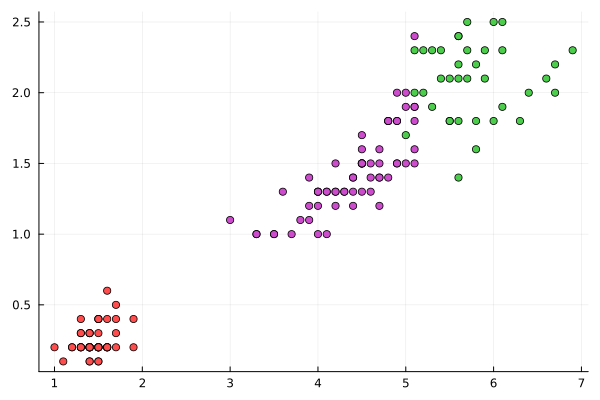

In [59]:
s_result

In [60]:
# cluster of ours
using Clustering

# loading the dataset
fuel_cluster = DataFrame(
    Diesel = df_diesel.Cost_in_Dollars,
    Regular_Petrol = df_regular_petrol.Cost_in_Dollars
    )
 
# features for clustering
features = collect(Matrix(fuel_cluster[:, 1:2])'); 
 
# result after running K-means for the 3 clusters
result = kmeans(features, 3); 
 
# plotting the result
fuel_result = scatter(fuel_cluster.Diesel, fuel_cluster.Regular_Petrol, 
        marker_z = result.assignments,
        color =:lightrainbow, legend = false)
 
# saving the result in PNG form
savefig("JuliaPlots/cluster_scatter_fuel_types.png")

LoadError: UndefVarError: `df_diesel` not defined

In [61]:
fuel_result

LoadError: UndefVarError: `fuel_result` not defined

In [62]:
function find_lowest_price(dataset)
    # Create an array of Float64 values    
    # Find the index of the smallest value in the array
    min_index = argmin(dataset)
    # Get the smallest value itself
    min_value = dataset[min_index]
    
    # Print the smallest value and its location
    println("The index is: $min_index is the smallest fuel price ", min_value/100)
    #println("Location (Index):", min_index)
    return(min_value / 100)
end

find_lowest_price (generic function with 1 method)

In [63]:
function long_df_process(dataset)
    dataset.Fuel_Type = replace(dataset.Fuel_Type, "Diesel price " => "Diesel")
    dataset.Fuel_Type = replace(dataset.Fuel_Type, "Regular petrol price " => "Regular petrol")
    dataset.Fuel_Type = replace(dataset.Fuel_Type, "Premium petrol 95R price " => "Premium petrol 95R")
    
    temp_df_diesel = filter(row -> row.Fuel_Type == "Diesel", dataset)

    # Filter the DataFrame for "Regular petrol" fuel type
    temp_df_reg_petrol = filter(row -> row.Fuel_Type == "Regular petrol", dataset)

    # Filter the DataFrame for "Regular petrol" fuel type
    temp_df_premium = filter(row -> row.Fuel_Type == "Premium petrol 95R", dataset)
    compiled_df = DataFrame(
        Regular_Petrol = temp_df_reg_petrol.Value,
        Diesel = temp_df_diesel.Value,
        Premium_Petrol = temp_df_premium.Value,
    )
    return(compiled_df)
end

long_df_process (generic function with 1 method)

In [64]:
# create longdf
longdf_year = []
for data in weekly_energy_prices.Week Number
    date_to_string = string(data)
    year = split(date_to_string,"-")[1]
    if !(year in longdf_year)
        push!(longdf_year, year)
    end
end

LoadError: UndefVarError: `weekly_energy_prices` not defined

In [65]:
new_df = DataFrame()
for data in longdf_year
    year_text = "$data"
    long_df_target = long_df_process(compile_year_data("$data", weekly_energy_prices))# |> long_df_process
    #long_df_target = long_df_process(compile_year_data("$data", weekly_energy_prices))
    #println(long_df_target)
    Diesel = find_lowest_price(long_df_target.Diesel)
    Regular_Petrol = find_lowest_price(long_df_target.Regular_Petrol)

    min_value_df = DataFrame(
        Year = data,
        Diesel = find_lowest_price(long_df_target.Diesel),
        Regular_Petrol = find_lowest_price(long_df_target.Regular_Petrol),
        Premium_Petrol_95R = find_lowest_price(long_df_target.Premium_Petrol) 
    )
    for row in eachrow(min_value_df)
        push!(new_df, row)
    end
end

In [66]:
new_df

""
""


In [67]:
# features for clustering
features = collect(Matrix(new_df[:, 2:3])'); 
 
# result after running K-means for the 3 clusters
result = kmeans(features, 3); 
 
# plotting the result
fuel_result = scatter(new_df.Diesel, new_df.Regular_Petrol, 
        marker_z = result.assignments,
        color =:lightrainbow, legend = false)
 
# saving the result in PNG form
savefig("JuliaPlots/cluster_scatter_fuel_types_year.png")

LoadError: BoundsError: attempt to access 0-element Vector{AbstractVector} at index [2:3]

In [68]:
?RData

search: RData RDatasets RDataException AbstractDataFrame AbstractDataTransform



No docstring found for module `RData`.

# Exported names

`CodecMissingError`, `DictoVec`, `RDataException`, `UnsupportedROBJ`, `load`, `sexp2julia`

# Displaying contents of readme found at `/home/sil/.julia/packages/RData/OT7M6/README.md`

# RData.jl

[![CI](https://github.com/JuliaData/RData.jl/workflows/CI/badge.svg)](https://github.com/JuliaData/RData.jl/actions?query=workflow%3ACI+branch%3Amain) [![codecov](https://codecov.io/gh/JuliaData/RData.jl/branch/main/graph/badge.svg)](https://codecov.io/gh/JuliaData/RData.jl) [![deps](https://juliahub.com/docs/RData/deps.svg)](https://juliahub.com/ui/Packages/RData/idMMA?t=2) [![version](https://juliahub.com/docs/RData/version.svg)](https://juliahub.com/ui/Packages/RData/idMMA) [![pkgeval](https://juliahub.com/docs/RData/pkgeval.svg)](https://juliahub.com/ui/Packages/RData/idMMA)

Read R data files (.rda, .RData) and optionally convert the contents into Julia equivalents.

Can read any R data archive, although not all R types could be converted into Julia.

For running R code from Julia see [RCall.jl](https://github.com/JuliaInterop/RCall.jl).

## Installation

From Julia REPL:

```julia
Pkg.add("RData")
```

### Compression formats

R data files could be compressed by either *Gzip* (the default), *Bzip2* or *Xz* methods. `RData.jl` supports *Gzip*-compressed files out-of-the-box. To read *Bzip2* or *Xz*-compressed files [CodecBzip2.jl](https://github.com/bicycle1885/CodecBzip2.jl) or [CodecXz.jl](https://github.com/bicycle1885/CodecXz.jl) must be installed.

For example, to load a file compressed by *Bzip2* you must first install the required codec:

```julia
Pkg.add("CodecBzip2")
```

Then ensure *CodecBzip2* is loaded before calling *RData.load*:

```julia
using RData
import CodecBzip2

load('some_bzip2_compressed.rda')
```

## Usage

To read R objects from "example.rda" file:

```julia
using RData

objs = load("path_to/example.rda")
```

The result is a dictionary (`Dict{String, Any}`) of all R objects stored in "example.rda".

If `convert=true` keyword option is specified, `load()` will try to automatically convert R objects into Julia equivalents:

| R object     | Julia object           |  | |–––––––|––––––––––––|–| | named vector, list | `DictoVec` | `DictoVec` allows indexing both by element index and by its name, just as R vectors and lists | | vector    | `Vector{T}` | `T` is the appropriate Julia type. If R vector contains `NA` values, they are converted to [`missing`](https://github.com/JuliaData/Missings.jl), and the elements type of the resulting `Vector` is `Union{T, Missing}`. | factor     | `CategoricalArray` | [CategoricalArrays.jl](https://github.com/JuliaData/CategoricalArrays.jl) | | `Date`     | `Dates.Date` | | | `POSIXct` date time | `ZonedDateTime` | [TimeZones.jl](https://github.com/JuliaTime/TimeZones.jl) | | data frame | `DataFrame` | [DataFrames.jl](https://github.com/JuliaData/DataFrames.jl) | | `compact_xxxseq` | `UnitRange`/`StepRange` | |

If conversion to the Julia type is not supported (e.g. R closure or language expression), `load()` will return the internal RData representation of the object (`RSEXPREC` subtype).


In [69]:
using RCall

In [70]:
@rput new_df

# Save the R DataFrame as an RData file using R's save function
R"save(new_df, file='prices_long.rda')"

RObject{NilSxp}
NULL


In [71]:
# prep for graphs
combinedfinal = load("combinedfinal.rda", convertdataframes=true)
combinedfinal = combinedfinal["combinedfinal"]

,Year,FuelCost,price,Brand,Model,TankSize,Fuelefficiency,Range,KM_10vehicles_26refuels,FuelCosts_10vehicles
,String,String,Float64,String,String,Float64,Float64,Float64,Float64,Float64
1,2004,Diesel,0.66,Ford,Ranger,80.0,9.0,319.053,82953.8,13728.0
2,2004,Diesel,0.66,Mitsubishi,Triton,75.0,9.5,434.304,112919.0,12870.0
3,2004,Diesel,0.66,Toyota,HiLux,80.0,7.5,415.765,1.08099e5,13728.0
4,2004,Diesel,0.66,Isuzu,D-Max,76.0,7.5,393.876,1.02408e5,13041.6
5,2004,Diesel,0.66,Hyundai,Santa Fe,67.0,6.5,380.157,98840.8,11497.2
6,2005,Diesel,0.735,Ford,Ranger,80.0,9.0,447.932,1.16462e5,15288.0
7,2005,Diesel,0.735,Mitsubishi,Triton,75.0,9.5,473.229,1.2304e5,14332.5
8,2005,Diesel,0.735,Toyota,HiLux,80.0,7.5,487.697,1.26801e5,15288.0
9,2005,Diesel,0.735,Isuzu,D-Max,76.0,7.5,353.142,91817.0,14523.6


In [72]:
combinedfinal |> describe

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Year,,2004,,2023,0,String
2,FuelCost,,Diesel,,Regular_Petrol,0,String
3,price,1.41612,0.66,1.3701,2.30297,0,Float64
4,Brand,,Ford,,Volkswagen,0,String
5,Model,,Corolla,,X-Trail,0,String
6,TankSize,58.3333,37.0,55.0,80.0,0,Float64
7,Fuelefficiency,6.73333,2.0,6.5,9.5,0,Float64
8,Range,398.255,300.144,396.583,499.292,0,Float64
9,KM_10vehicles_26refuels,1.03546e5,78037.4,1.03111e5,129816.0,0,Float64


In [73]:
# useful fields  and code

# dissd_noall = dissd |>
#   @filter(_.Entity .!= "All natural disasters") |>
#   DataFrame

In [74]:
# to randomise data incase wanting to randomise the graph in R
# combinedfinal <- combinedfinal %>%
#   rowwise() %>%
#   mutate(
#     Range = runif(1, min = 300, max = 500),
#     KM_10vehicles_26refuels = 10 * Range * 26,
#     FuelCosts_10vehicles = 10 * TankSize * 26 * price
#   ) %>%
#   ungroup() %>%
#   select(Year, FuelCost, price, Brand, Model, TankSize, Fuelefficiency, Range, KM_10vehicles_26refuels, FuelCosts_10vehicles)

In [75]:
# Fix column names by replacing ' ', '-', '/' with '_'
colnames = Symbol[]
for i in string.(names(combinedfinal))
    push!(colnames,Symbol(replace(replace(replace(strip(i)," " => "_"),"-" => "_"), "/" => "_")))
end

rename!(combinedfinal, colnames);

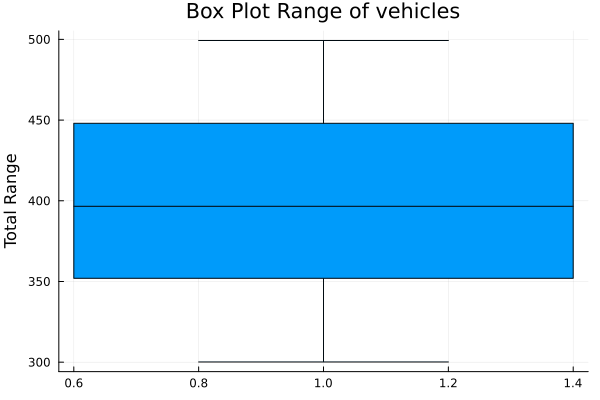

In [76]:
cid_bxplt = boxplot(combinedfinal.Range, title = "Box Plot Range of vehicles", ylabel = "Total Range", legend = false)
#savefig("JuliaPlots/cf_boxplot_FuelCost.png")
cid_bxplt

In [77]:
"""
Plot the data guideline
l_value = "Premium petrol 95R"
l_column = "Fuel_Type"
c_toplot = "Cost in Dollars"
figname = "lineplot_prem_petrol"
plot_data(df_fuelprice_dollars, l_value, l_column, c_toplot, figname)
"""

"Plot the data guideline\nl_value = \"Premium petrol 95R\"\nl_column = \"Fuel_Type\"\nc_toplot = \"Cost in Dollars\"\nfigname = \"lineplot_prem_petrol\"\nplot_data(df_fuelprice_dollars, l_value, l_column, c_toplot, figname)\n"

In [78]:
# cluster of ours
using Clustering

# loading the dataset
fuel_cluster = DataFrame(
    Range = combinedfinal.Range,
    Fuel_Cost = combinedfinal.price
    )
 
# features for clustering
features = collect(Matrix(fuel_cluster[:, 1:2])'); 
 
# result after running K-means for the 3 clusters
result = kmeans(features, 3); 
 
# plotting the result
fuel_result = scatter(fuel_cluster.Range, fuel_cluster.Fuel_Cost,
        marker_z = result.assignments,
        color =:lightrainbow, legend = false)
 
# saving the result in PNG form
savefig("JuliaPlots/combinedfinal_cluster_scatter_fuel_types.png")

"/mnt/d/OneDrive/OneDrive - University of Canterbury/DATA422 Group Project/Project Notes/JuliaPlots/combinedfinal_cluster_scatter_fuel_types.png"

In [79]:
# Load the installed packages
using Lathe, GLM, Statistics, StatsPlots, MLBase

# Enable printing of 1000 columns
ENV["COLUMNS"] = 1000

1000

In [80]:
# Fix column names by replacing ' ', '-', '/' with '_'
colnames = Symbol[]
for i in string.(names(combinedfinal))
    push!(colnames,Symbol(replace(replace(replace(strip(i)," " => "_"),"-" => "_"), "/" => "_")))
end

rename!(combinedfinal, colnames);

In [81]:
combine(groupby(combinedfinal, :FuelCost), nrow => :Freq)

,FuelCost,Freq
,String,Int64
1,Diesel,100
2,Regular_Petrol,180
3,Premium_Petrol_95R,20


In [82]:
df_diesel = filter(row -> row.FuelCost == "Diesel", combinedfinal)

# Filter the DataFrame for "Regular petrol" fuel type
df_regular_petrol = filter(row -> row.FuelCost == "Regular_Petrol", combinedfinal)

df_premium_petrol = filter(row -> row.FuelCost == "Premium_Petrol_95R", combinedfinal)

# Display the separate DataFrames
println("DataFrame for Diesel:")
println(df_diesel)

println("\nDataFrame for Regular petrol:")
println(df_regular_petrol)

println("\nDataFrame for Premium petrol:")
println(df_premium_petrol)

unique_fuel_types = unique(combinedfinal.FuelCost)
println(unique_fuel_types)
print(length(df_diesel.KM_10vehicles_26refuels))
# make sure the two columns have the same length unfortunately this means data is lost!
cor_df = DataFrame(
    Diesel = df_diesel.KM_10vehicles_26refuels,
    Regular_Petrol = df_regular_petrol.KM_10vehicles_26refuels[1:length(df_diesel.KM_10vehicles_26refuels)]
    )
cor_df

DataFrame for Diesel:
100×10 DataFrame
 Row │ Year    FuelCost  price     Brand       Model     TankSize  Fuelefficiency  Range    KM_10vehicles_26refuels  FuelCosts_10vehicles 
     │ String  String    Float64   String      String    Float64   Float64         Float64  Float64                  Float64              
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 2004    Diesel    0.66      Ford        Ranger        80.0             9.0  319.053            82953.8                     13728.0
   2 │ 2004    Diesel    0.66      Mitsubishi  Triton        75.0             9.5  434.304           112919.0                     12870.0
   3 │ 2004    Diesel    0.66      Toyota      HiLux         80.0             7.5  415.765                1.08099e5               13728.0
   4 │ 2004    Diesel    0.66      Isuzu       D-Max         76.0             7.5  393.876                1.02408e5               

,Diesel,Regular_Petrol
,Float64,Float64
1,82953.8,1.29781e5
2,112919.0,1.01268e5
3,1.08099e5,125033.0
4,1.02408e5,83459.1
5,98840.8,1.13477e5
6,1.16462e5,1.28583e5
7,1.2304e5,98730.2
8,1.26801e5,1.28812e5
9,91817.0,1.28364e5


In [83]:
df_diesel

,Year,FuelCost,price,Brand,Model,TankSize,Fuelefficiency,Range,KM_10vehicles_26refuels,FuelCosts_10vehicles
,String,String,Float64,String,String,Float64,Float64,Float64,Float64,Float64
1,2004,Diesel,0.66,Ford,Ranger,80.0,9.0,319.053,82953.8,13728.0
2,2004,Diesel,0.66,Mitsubishi,Triton,75.0,9.5,434.304,112919.0,12870.0
3,2004,Diesel,0.66,Toyota,HiLux,80.0,7.5,415.765,1.08099e5,13728.0
4,2004,Diesel,0.66,Isuzu,D-Max,76.0,7.5,393.876,1.02408e5,13041.6
5,2004,Diesel,0.66,Hyundai,Santa Fe,67.0,6.5,380.157,98840.8,11497.2
6,2005,Diesel,0.735,Ford,Ranger,80.0,9.0,447.932,1.16462e5,15288.0
7,2005,Diesel,0.735,Mitsubishi,Triton,75.0,9.5,473.229,1.2304e5,14332.5
8,2005,Diesel,0.735,Toyota,HiLux,80.0,7.5,487.697,1.26801e5,15288.0
9,2005,Diesel,0.735,Isuzu,D-Max,76.0,7.5,353.142,91817.0,14523.6


Correlation of Diesel with Regular Petrol 0.30355930493130745




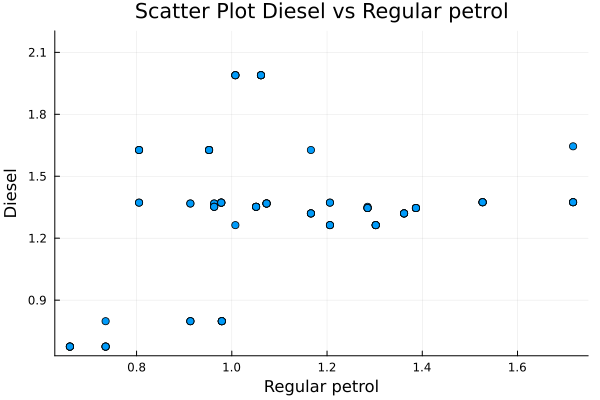

In [84]:
# Correlation Analysis
#println("Correlation of Life Expectancy with Adult Mortality Rate is ", cor(df.Regular_Petrol,df.Diesel), "\n\n")
println("Correlation of Diesel with Regular Petrol ", cor(df_diesel.price,df_regular_petrol.price[1:length(df_diesel.price)]), "\n\n")

# Scatter plot
train_plot = scatter(df_diesel.price,df_regular_petrol.price, title = "Scatter Plot Diesel vs Regular petrol", ylabel = "Diesel", xlabel = "Regular petrol",legend = false)
savefig("JuliaPlots/combinedfinal_scatter_trainPlot.png")
train_plot

In [85]:
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(cor_df,.75)
fm = @formula(Diesel ~ Regular_Petrol)
linearRegressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Diesel ~ 1 + Regular_Petrol

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                       Coef.     Std. Error     t  Pr(>|t|)      Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)     90727.9       10497.5        8.64    <1e-12  69815.8         1.1164e5
Regular_Petrol      0.102436      0.0991277  1.03    0.3047     -0.0950365   0.299909
─────────────────────────────────────────────────────────────────────────────────────

In [86]:

# R Square value of the model
r2(linearRegressor)
#> 0.4548557168286279

0.014038295649292376

In [87]:
# Prediction
ypredicted_test = predict(linearRegressor, test)
ypredicted_train = predict(linearRegressor, train)

# Test Performance DataFrame (compute squared error)
performance_testdf = DataFrame(y_actual = test[!,:Diesel], y_predicted = ypredicted_test)
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error

# Train Performance DataFrame (compute squared error)
performance_traindf = DataFrame(y_actual = train[!,:Diesel], y_predicted = ypredicted_train)
performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error ;

In [88]:
# MAPE function defination
function mape(performance_df)
    mape = mean(abs.(performance_df.error./performance_df.y_actual))
    return mape
end

# RMSE function defination
function rmse(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end

# RMSE function defination
function rmse(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end

rmse (generic function with 1 method)

In [89]:
# Test Error
println("Mean Absolute test error: ",mean(abs.(performance_testdf.error)), "\n")
println("Mean Aboslute Percentage test error: ",mape(performance_testdf), "\n")
println("Root mean square test error: ",rmse(performance_testdf), "\n")
println("Mean square test error: ",mean(performance_testdf.error_sq), "\n")

Mean Absolute test error: 12077.463672981143

Mean Aboslute Percentage test error: 0.11692361152207935

Root mean square test error: 13791.147188377136

Mean square test error: 1.9019574077148256e8



In [90]:
# Train  Error
println("Mean train error: ",mean(abs.(performance_traindf.error)), "\n")
println("Mean Absolute Percentage train error: ",mape(performance_traindf), "\n")
println("Root mean square train error: ",rmse(performance_traindf), "\n")
println("Mean square train error: ",mean(performance_traindf.error_sq), "\n")

Mean train error: 11229.773258080348

Mean Absolute Percentage train error: 0.1137044434326305

Root mean square train error: 13714.358692426531

Mean square train error: 1.8808363434453514e8



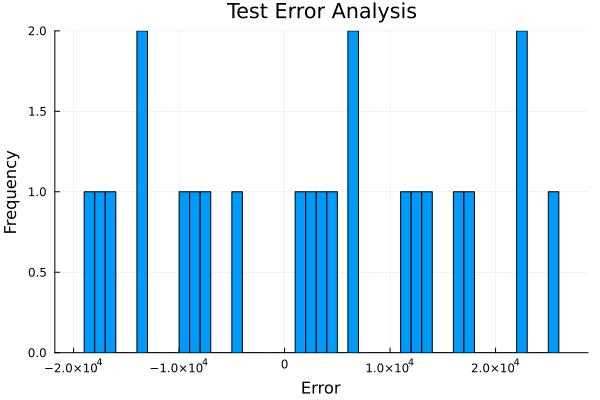

In [91]:
# Histogram of error to see if it's normally distributed  on test dataset
test_df_hist = histogram(performance_testdf.error, bins = 50, title = "Test Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)
savefig("JuliaPlots/combinedfinal_histogram_perfomance_testdf_error.png")
test_df_hist

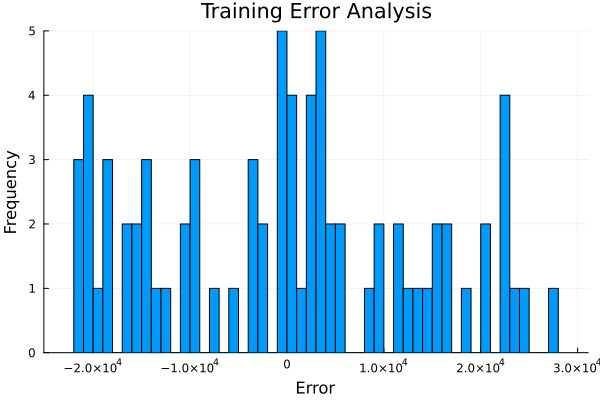

In [92]:
# Histogram of error to see if it's normally distributed  on train dataset
train_df_hist = histogram(performance_traindf.error, bins = 50, title = "Training Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)
savefig("JuliaPlots/combinedfinal_histogram_performance_traindf_error.png")
train_df_hist

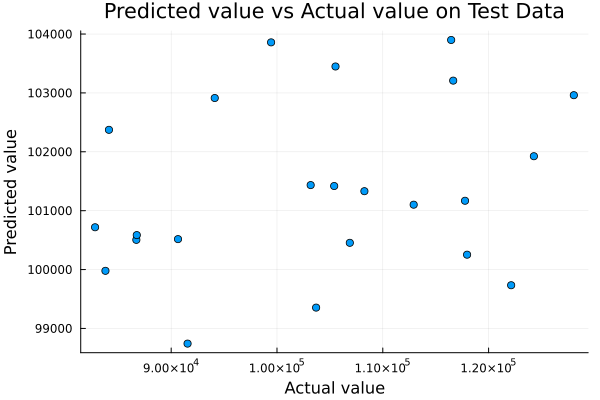

In [93]:
# Scatter plot of actual vs predicted values on test dataset
test_plot = scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted], title = "Predicted value vs Actual value on Test Data", ylabel = "Predicted value", xlabel = "Actual value", legend = false)
savefig("JuliaPlots/combinedfinal_scatter_performance_testdf_error.png")
test_plot

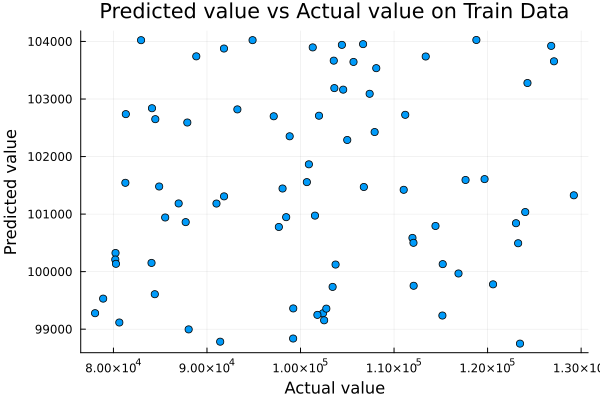

In [94]:
# Scatter plot of actual vs predicted values on train dataset
train_plot = scatter(performance_traindf[!,:y_actual],performance_traindf[!,:y_predicted], title = "Predicted value vs Actual value on Train Data", ylabel = "Predicted value", xlabel = "Actual value",legend = false)
savefig("JuliaPlots/combinedfinal_scatter_performance_traindf.png")
train_plot

In [95]:
function find_smallest_k(dataset)
     # Create an array of Float64 values    
    # Find the index of the smallest value in the array
    min_index = argmin(dataset)
    # Get the smallest value itself
    min_value = dataset[min_index]
    
    # Print the smallest value and its location
    println("Mean error for set $min_index is the smallest value ", min_value)
    #println("Location (Index):", min_index)
end


# Cross Validation function defination
function cross_validation(train,k, fm = @formula(Diesel ~ Regular_Petrol))   
    a = collect(Kfold(size(train)[1], k))
    mean_data_points = []
    for i in 1:k
        row = a[i]
        temp_train = train[row,:]
        temp_test = train[setdiff(1:end, row),:]
        linearRegressor = lm(fm, temp_train)
        performance_testdf = DataFrame(y_actual = temp_test[!,:Diesel], y_predicted = predict(linearRegressor, temp_test))
        performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]

        println("Mean error for set $i is ",mean(abs.(performance_testdf.error)))
        push!(mean_data_points,  mean(abs.(performance_testdf.error)))
    end
    find_smallest_k(mean_data_points)
end

cross_validation (generic function with 2 methods)

In [96]:
cross_validation(train,10)

Mean error for set 1 is 8488.441567022177
Mean error for set 2 is 14661.46023002037
Mean error for set 3 is 9142.711477609771
Mean error for set 4 is 13092.134944832653
Mean error for set 5 is 13417.911380616442
Mean error for set 6 is 11051.861513988499
Mean error for set 7 is 9060.587817503767
Mean error for set 8 is 14507.321218491656
Mean error for set 9 is 14525.116013756755
Mean error for set 10 is 9249.730675787903
Mean error for set 1 is the smallest value 8488.441567022177


In [97]:
cross_validation(train,size(train)[1])

Mean error for set 1 is 24332.083485338488
Mean error for set 2 is 13333.256769969623
Mean error for set 3 is 25973.151268729343
Mean error for set 4 is 2860.41238800915
Mean error for set 5 is 17332.56941582072
Mean error for set 6 is 18308.757930732085
Mean error for set 7 is 3247.3035009936866
Mean error for set 8 is 2653.9882968110323
Mean error for set 9 is 20429.40855226548
Mean error for set 10 is 15473.469970632344
Mean error for set 11 is 28262.75512880896
Mean error for set 12 is 22031.36425030914
Mean error for set 13 is 2097.0864357262035
Mean error for set 14 is 23896.46888998238
Mean error for set 15 is 2754.413470195912
Mean error for set 16 is 2514.410234985058
Mean error for set 17 is 3407.8305478110997
Mean error for set 18 is 16264.141146215814
Mean error for set 19 is 4415.429531902206
Mean error for set 20 is 7736.59343206753
Mean error for set 21 is 20535.265214334067
Mean error for set 22 is 19246.168150551268
Mean error for set 23 is 20494.0458807534
Mean error 

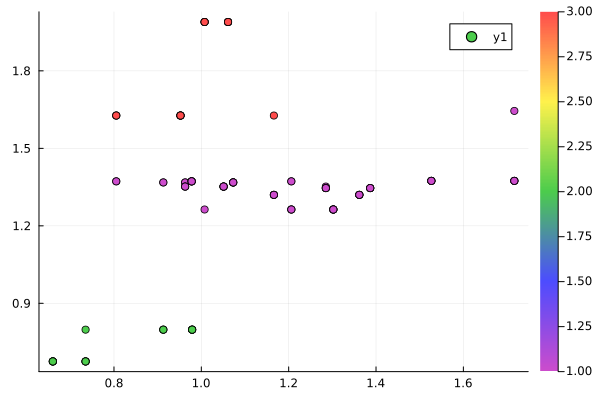

In [98]:
# cluster of ours
using Clustering

# loading the dataset
fuel_cluster = DataFrame(
    Diesel = df_diesel.price,
    Regular_Petrol = df_regular_petrol.price[1:length(df_diesel.price)]
    )
 
# features for clustering
features = collect(Matrix(fuel_cluster[:, 1:2])'); 
 
# result after running K-means for the 3 clusters
result = kmeans(features, 3); 
 
# plotting the result
fuel_result = scatter(fuel_cluster.Diesel, fuel_cluster.Regular_Petrol, 
        marker_z = result.assignments,
        color =:lightrainbow, legend = true)
 
# saving the result in PNG form
savefig("JuliaPlots/combinedfinal_cluster_scatter_fuel_types.png")
fuel_result

In [99]:
#show(df_diesel.KM_10vehicles_26refuels)
fuel_cluster


,Diesel,Regular_Petrol
,Float64,Float64
1,0.66,0.675
2,0.66,0.675
3,0.66,0.675
4,0.66,0.675
5,0.66,0.675
6,0.735,0.675
7,0.735,0.675
8,0.735,0.675
9,0.735,0.675
